# k-means Tutorial: How the Choice of *k* Affects Clustering Quality


In [246]:
# Import thw necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Make plots it look consistent
rcParams['figure.figsize'] = (7,5)
rcParams['axes.grid'] = False


## Colour-blind-safe palette and accessibility notes

- I use the **Okabe–Ito** palette which is friendly for colour-blind viewers.
- Plots will use distinct markers as well as colours so differences are not conveyed by colour alone.


In [249]:
# Okabe-Ito colour-blind friendly palette
PALETTE = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7']
MARKERS = ['o', 's', 'D', '^', 'v', 'P', 'X']


## Generate synthetic dataset

I generate a dataset with 4 true clusters.

In [283]:
# Generate data with 4 centers
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.7, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # scale features (important for k-means)

print('X shape:', X.shape)

X shape: (500, 2)


In [285]:
def plot_clusters(X, labels, centroids=None, title='k-means clustering', k=None):
    unique_labels = np.unique(labels)
    plt.figure(figsize=(7,5))

    for i, lab in enumerate(unique_labels):
        mask = labels == lab
        color = PALETTE[i % len(PALETTE)]
        marker = MARKERS[i % len(MARKERS)]
        plt.scatter(X[mask, 0], X[mask, 1],
                    label=f'Cluster {lab}', marker=marker, s=30,
                    edgecolor='k', linewidth=0.2)

    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='o', s=200, linewidth=1.0, edgecolor='k')

    plt.title(title)
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.legend(markerscale=1, fontsize='small', loc='best')
    plt.tight_layout()

    # ---------- NEW PART: save with correct k ----------
    if k is not None:
        filename = f"k-means_k{k}.png"
    else:
        filename = "k-means.png"

    plt.savefig(filename, dpi=300)
    plt.show()
    print(f"Saved: {filename}")

## Visual comparison: k = 2 (under), 4 (true), 6 (over)

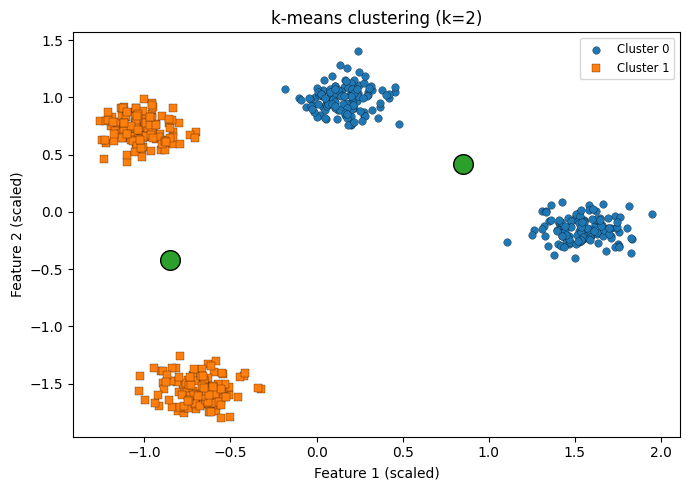

Saved: k-means_k2.png


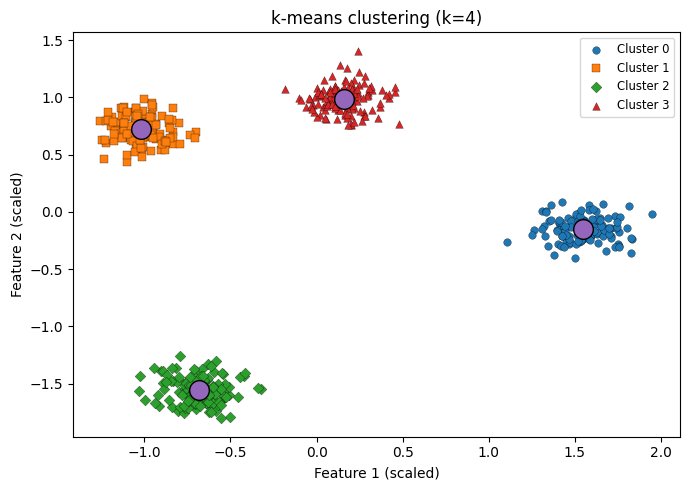

Saved: k-means_k4.png


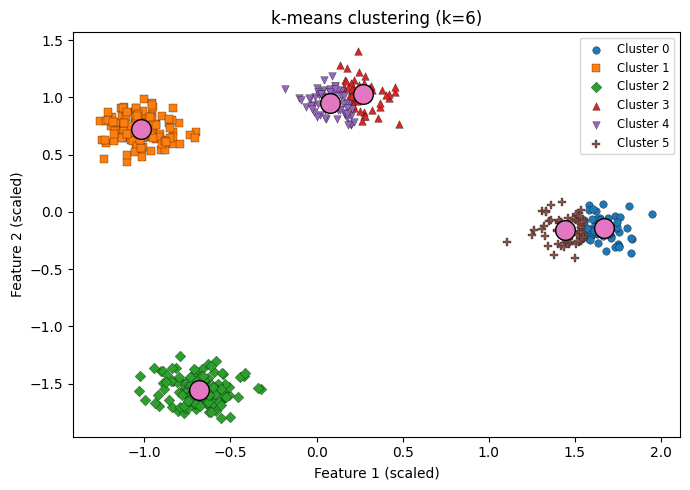

Saved: k-means_k6.png


In [258]:
for k in[2,4,6]:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    plot_clusters(X_scaled, labels, km.cluster_centers_, k=k,
                  title=f'k-means clustering (k={k})')

## Elbow method (WCSS vs k)
To create the elbow curve, I calculate the within-cluster sum of squares (inertia) for k values from 1 to 10 and plot these inertia values against k to see where adding more clusters stops giving big improvements.

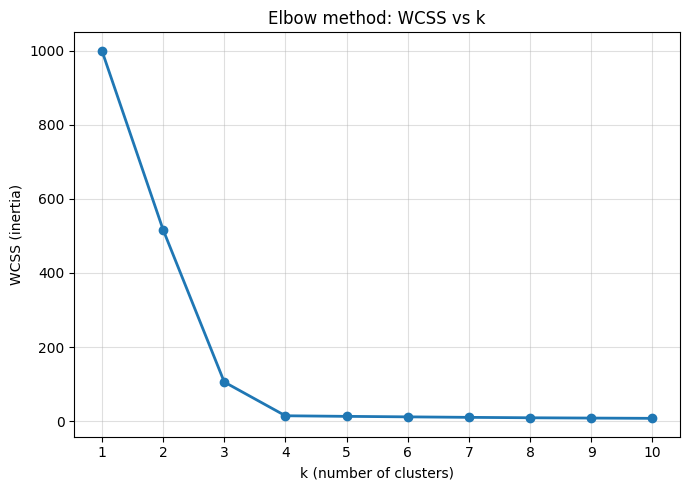

In [262]:
wcss = []
K_range = range(1,11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(list(K_range), wcss, marker='o', linewidth=2)
plt.xlabel('k (number of clusters)')
plt.ylabel('WCSS (inertia)')
plt.title('Elbow method: WCSS vs k')
plt.xticks(list(K_range))
plt.grid(True, linestyle='-', alpha=0.4)
plt.tight_layout()
plt.savefig("Elbow plot",dpi=300)
plt.show()

## Silhouette score analysis

I compute the silhouette score for k values from 2 to 10, since the silhouette metric is not defined for k = 1, and I use these scores to evaluate how well the data fits each number of clusters.

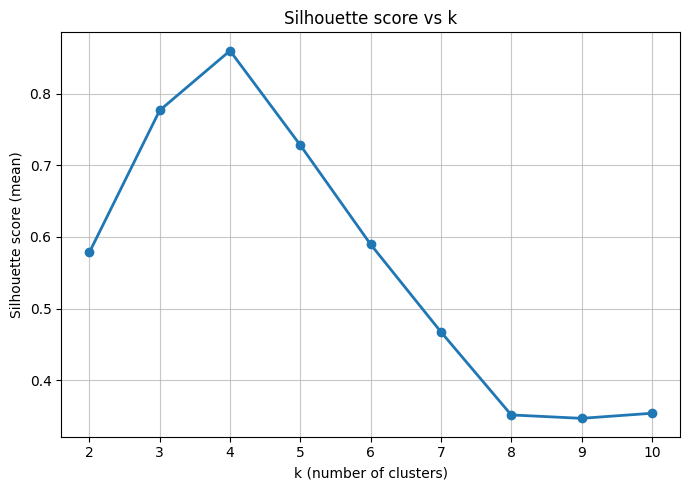

k=2: silhouette=0.58
k=3: silhouette=0.78
k=4: silhouette=0.86
k=5: silhouette=0.73
k=6: silhouette=0.59
k=7: silhouette=0.47
k=8: silhouette=0.35
k=9: silhouette=0.35
k=10: silhouette=0.35


In [264]:
sil_scores = []
K_range2 = range(2,11)
for k in K_range2:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure(figsize=(7,5))
plt.plot(list(K_range2), sil_scores, marker='o', linewidth=2)
plt.xlabel('k (number of clusters)')
plt.ylabel('Silhouette score (mean)')
plt.title('Silhouette score vs k')
plt.xticks(list(K_range2))
plt.grid(True, linestyle='-', alpha=0.7)
plt.tight_layout()
plt.savefig("Silhouette score",dpi=300)
plt.show()

for k, s in zip(K_range2, sil_scores):
    print(f'k={k}: silhouette={s:.2f}')

### Silhouette plot for k=4 (detailed view)

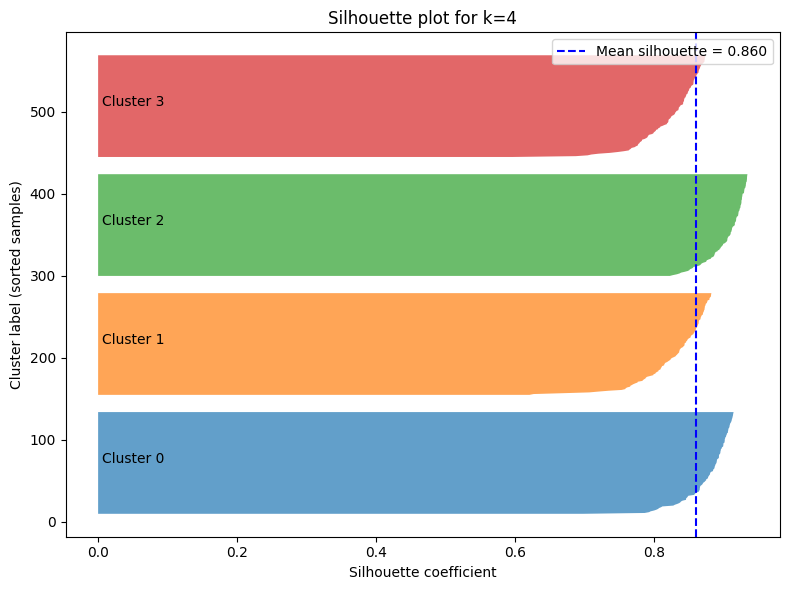

In [266]:
import matplotlib.cm as cm

k = 4
km = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = km.fit_predict(X_scaled)
sil_vals = silhouette_samples(X_scaled, labels)
y_lower = 10
plt.figure(figsize=(8,6))
for i in range(k):
    ith_sil_vals = sil_vals[labels == i]
    ith_sil_vals.sort()
    size = ith_sil_vals.shape[0]
    y_upper = y_lower + size
    color = cm.nipy_spectral(float(i) / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_sil_vals, alpha=0.7)
    plt.text(0.005, y_lower + 0.5 * size, f'Cluster {i}')
    y_lower = y_upper + 20
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster label (sorted samples)')
plt.title('Silhouette plot for k=4')
plt.axvline(x=np.mean(sil_vals), color='blue', linestyle='--', label=f'Mean silhouette = {np.mean(sil_vals):.3f}')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("Silhouette plot",dpi=300)
plt.show()